# Final Project 

Let's start by importing the libraries that  we will be using.

In [1]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Let's check the features present in our data and then we will look at their datatypes. 

In [3]:
train.shape 

(79853, 12)

In [4]:
test.shape

(34224, 11)

We have 11 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data. 

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their datatypes. 

In [5]:
# Print data types for each variable
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [6]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [7]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

It can be infered that subscribed is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.  

In [8]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


# Univariate Analysis 

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and barplot. 

In [9]:
train['perc_premium_paid_by_cash_credit']

0        0.429
1        0.010
2        0.917
3        0.049
4        0.052
         ...  
79848    0.425
79849    0.704
79850    0.000
79851    0.398
79852    0.550
Name: perc_premium_paid_by_cash_credit, Length: 79853, dtype: float64

In [10]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [11]:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

In [12]:
# Normalize can be set to True to print proportions instead of number 
train['target'].value_counts(normalize=True)

1    0.93741
0    0.06259
Name: target, dtype: float64

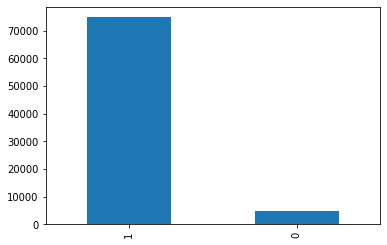

In [13]:
# plotting the bar plot of frequencies
train['target'].value_counts().plot.bar()

So, 3715 users out of total 79000 have subscribed which is around 6%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most. 

# Data Cleaning : 

Let's first look at the distribution of percentage premium paid cash credit variable to see how many people belongs to a particular group. 

In [14]:
train['percentage_premium_paid_cash_credit'] = train.perc_premium_paid_by_cash_credit.apply(lambda x: x * 100)
test['percentage_premium_paid_cash_credit'] = test.perc_premium_paid_by_cash_credit.apply(lambda x: x * 100)

In [15]:
train.percentage_premium_paid_cash_credit.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    79853.000000
mean        31.428774
std         33.491457
min          0.000000
0%           0.000000
25%          3.400000
50%         16.700000
75%         53.800000
90%         92.500000
95%        100.000000
99%        100.000000
100%       100.000000
max        100.000000
Name: percentage_premium_paid_cash_credit, dtype: float64

In [16]:
test.percentage_premium_paid_cash_credit.describe(percentiles= [0,0.25,0.5,0.75,0.9,0.95,0.99,1])

count    34224.000000
mean        31.445743
std         33.405873
min          0.000000
0%           0.000000
25%          3.400000
50%         16.900000
75%         54.000000
90%         92.000000
95%        100.000000
99%        100.000000
100%       100.000000
max        100.000000
Name: percentage_premium_paid_cash_credit, dtype: float64

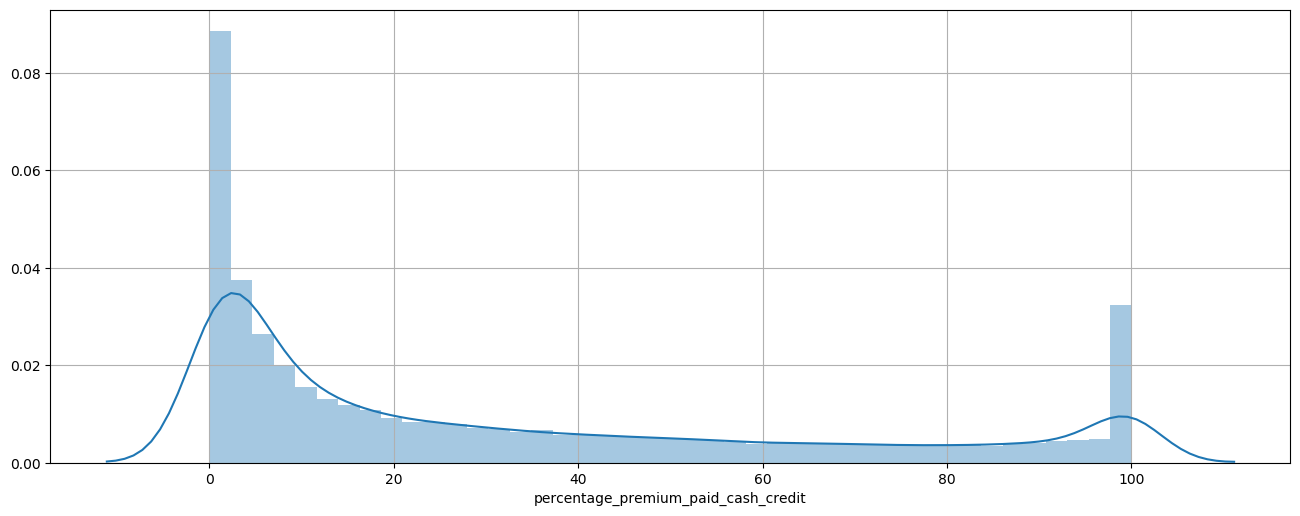

In [17]:
plt.figure(figsize=(16, 6),  dpi= 100)
sns.distplot(train.percentage_premium_paid_cash_credit)
plt.grid()
plt.show()

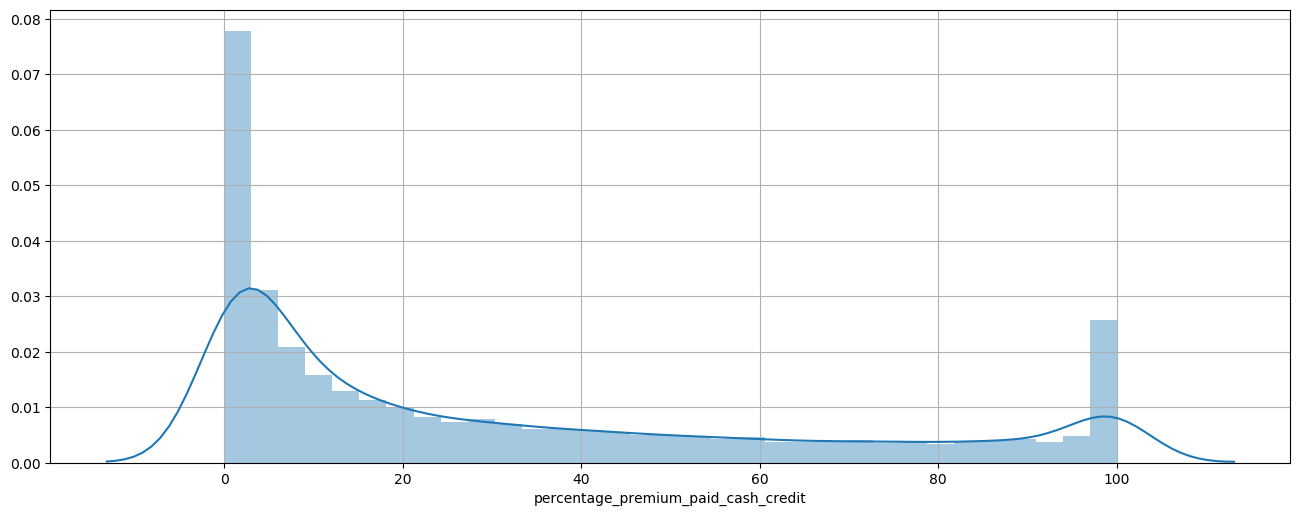

In [18]:
plt.figure(figsize=(16, 6),  dpi= 100)
sns.distplot(test.percentage_premium_paid_cash_credit)
plt.grid()
plt.show()

Let's now we look at the distribution of age variable to see how many people belongs to a particular age group. 

In [19]:
train['age'] = train['age_in_days']/365 

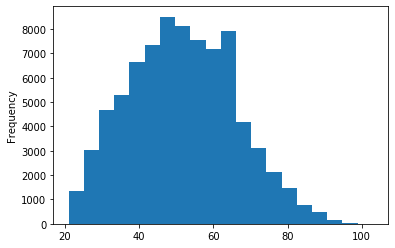

In [20]:
train['age'].astype('int').plot(kind = 'hist',bins = 20)

We can infer that most of the clients fall in the age group between 20-60.  

In [21]:
train['age'].describe()

count    79853.000000
mean        51.634786
std         14.270463
min         21.013699
25%         41.024658
50%         51.027397
75%         62.016438
max        103.019178
Name: age, dtype: float64

In [22]:
train.query('age > 100')

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,percentage_premium_paid_cash_credit,age
5045,7248,0.010,37240,99060,0.0,0.0,0.0,99.89,5,A,Urban,1,1.0,102.027397
19085,67942,0.110,37239,102580,0.0,0.0,0.0,99.27,9,B,Urban,1,11.0,102.024658
26029,48348,0.026,36870,50050,0.0,0.0,0.0,99.87,7,A,Rural,1,2.6,101.013699
38401,44175,0.003,36874,86570,2.0,0.0,0.0,NaN,8,A,Rural,0,0.3,101.024658
38441,111319,1.000,37602,48130,0.0,0.0,0.0,NaN,5,A,Rural,1,100.0,103.019178


# Filling The Missing Values : 

In [23]:
train.isnull().sum()

id                                        0
perc_premium_paid_by_cash_credit          0
age_in_days                               0
Income                                    0
Count_3-6_months_late                    97
Count_6-12_months_late                   97
Count_more_than_12_months_late           97
application_underwriting_score         2974
no_of_premiums_paid                       0
sourcing_channel                          0
residence_area_type                       0
target                                    0
percentage_premium_paid_cash_credit       0
age                                       0
dtype: int64

In [24]:
test.isnull().sum()

id                                        0
perc_premium_paid_by_cash_credit          0
age_in_days                               0
Income                                    0
Count_3-6_months_late                    31
Count_6-12_months_late                   31
Count_more_than_12_months_late           31
application_underwriting_score         1323
no_of_premiums_paid                       0
sourcing_channel                          0
residence_area_type                       0
percentage_premium_paid_cash_credit       0
dtype: int64

# Bivariate Analysis 

target                  0      1
residence_area_type             
Rural                1998  29672
Urban                3000  45183


Text(0, 0.5, 'Percentage')

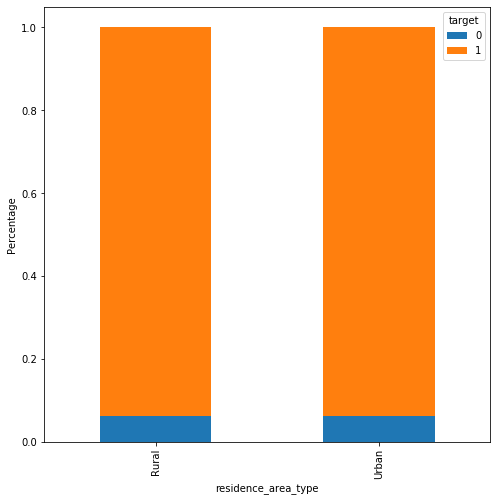

In [25]:
print(pd.crosstab(train['residence_area_type'],train['target']))

job=pd.crosstab(train['residence_area_type'],train['target'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('residence_area_type')
plt.ylabel('Percentage')

From the above graph we can infer that both residents of urban and rural area has approximately equal probability (or Chance) of giving the premium. Next, let's explore this for different sourcing channels. 

target               0      1
sourcing_channel             
A                 2349  40785
B                 1066  15446
C                  903  11136
D                  634   6925
E                   46    563


Text(0, 0.5, 'Percentage')

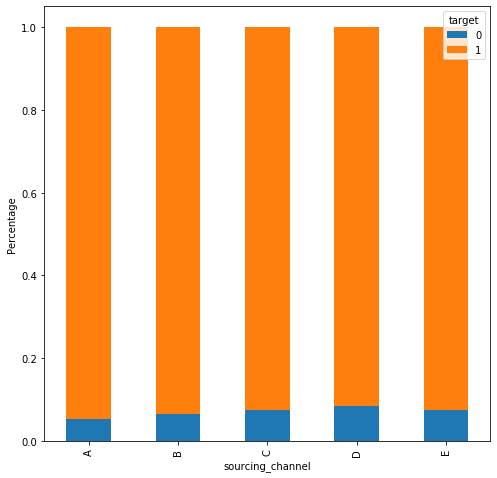

In [26]:
print(pd.crosstab(train['sourcing_channel'],train['target']))

job=pd.crosstab(train['sourcing_channel'],train['target'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('sourcing_channel')
plt.ylabel('Percentage')

We can infer that clients having sourcing channels (C, D or E) have slightly higher chances of defaulting to a term loan as compared to the clients having sourcing channels(A or B). 

target                             0      1
Count_more_than_12_months_late             
0.0                             3750  72288
1.0                              835   2161
2.0                              228    270
3.0                               85     66
4.0                               25     23
5.0                                7      6
6.0                                4      2
7.0                                2      1
8.0                                1      1
11.0                               1      0


Text(0, 0.5, 'Percentage')

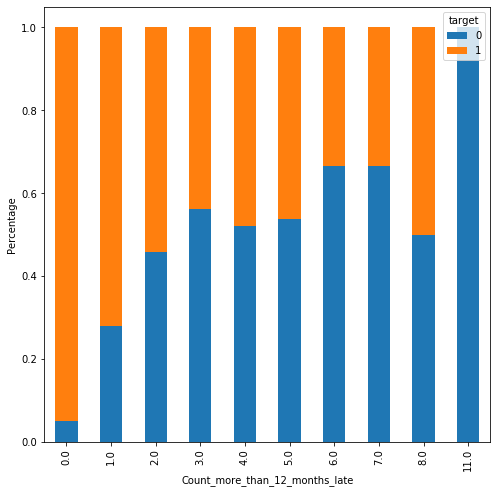

In [27]:
print(pd.crosstab(train['Count_more_than_12_months_late'],train['target']))

default=pd.crosstab(train['Count_more_than_12_months_late'],train['target'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Count_more_than_12_months_late')
plt.ylabel('Percentage')

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable in to numeric values first. 

In [28]:
train['target'].replace('no', 0,inplace=True)
train['target'].replace('yes', 1,inplace=True)

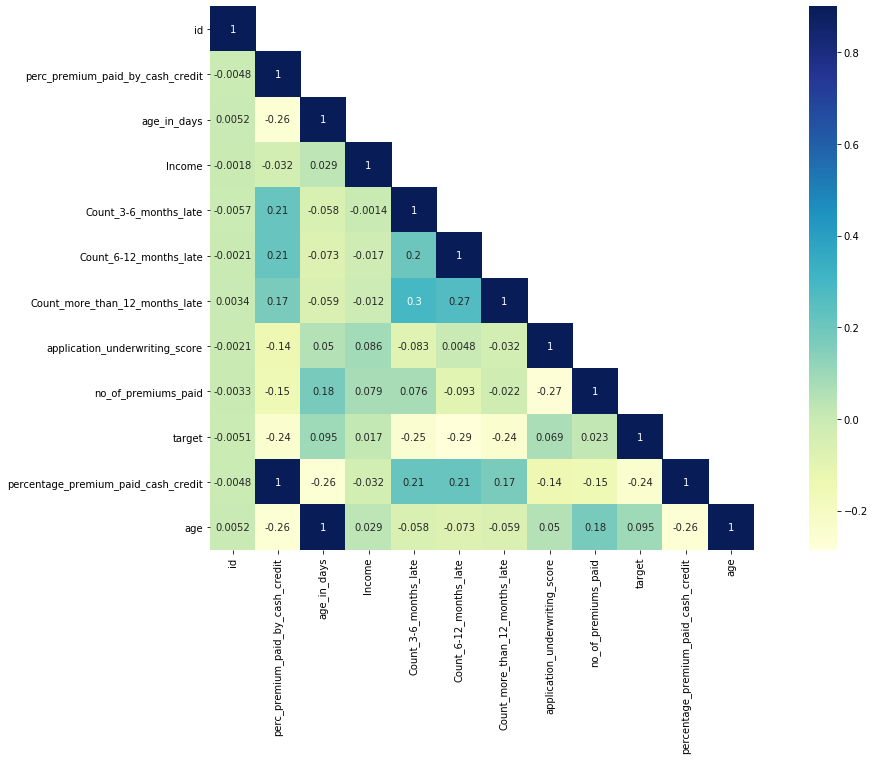

In [29]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

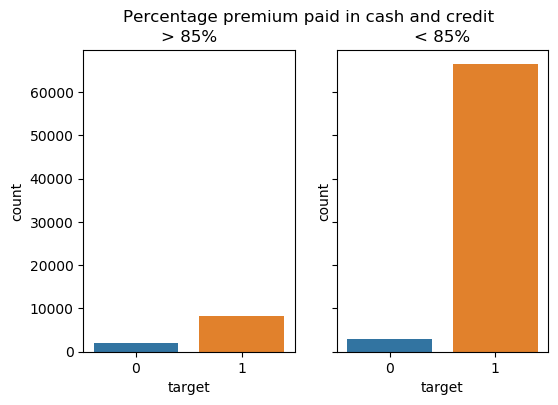

In [30]:
fig, ax = plt.subplots(1, 2, sharey='row', dpi = 100)
ax[0].set_title('> 85%')
sns.barplot(x = 'target', y = 'count', ax = ax[0],
            data = train[train.percentage_premium_paid_cash_credit > 85].groupby('target').nunique()['id'].reset_index().rename(
            columns = {'id': 'count'}))
ax[1].set_title('< 85%')
sns.barplot(x = 'target', y = 'count', ax = ax[1],
            data = train[train.percentage_premium_paid_cash_credit < 85].groupby('target').nunique()['id'].reset_index().rename(
            columns = {'id': 'count'}))
plt.suptitle('Percentage premium paid in cash and credit')
plt.show()

In [31]:
train['total_count_late'] = train['Count_more_than_12_months_late'] + train['Count_6-12_months_late'] + train['Count_3-6_months_late']
test['total_count_late'] = test['Count_more_than_12_months_late'] + test['Count_6-12_months_late'] + test['Count_3-6_months_late']

In [32]:
train[['total_count_late','target']].corr()

,total_count_late,target
total_count_late,1.000000,-0.356396
target,-0.356396,1.000000


In [33]:
train['perc_late_paid'] = train['total_count_late']/train['no_of_premiums_paid']
test['perc_late_paid'] = test['total_count_late']/test['no_of_premiums_paid']

In [34]:
train[['perc_late_paid','target']].corr()

,perc_late_paid,target
perc_late_paid,1.000000,-0.335961
target,-0.335961,1.000000


In [35]:
train.corr()['target'].sort_values()

total_count_late                      -0.356396
perc_late_paid                        -0.335961
Count_6-12_months_late                -0.286159
Count_3-6_months_late                 -0.248900
perc_premium_paid_by_cash_credit      -0.240980
percentage_premium_paid_cash_credit   -0.240980
Count_more_than_12_months_late        -0.240385
id                                    -0.005064
Income                                 0.016541
no_of_premiums_paid                    0.022664
application_underwriting_score         0.068715
age_in_days                            0.095103
age                                    0.095103
target                                 1.000000
Name: target, dtype: float64

In [36]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target', 'percentage_premium_paid_cash_credit', 'age',
       'total_count_late', 'perc_late_paid'],
      dtype='object')

In [37]:
train.shape

(79853, 16)

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not. 

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable. 

# Model Building 

In [38]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set. 

In [39]:
test = pd.get_dummies(test)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
training, validation = train_test_split(train, test_size=0.25, stratify=train['target'], random_state=1234)

In [42]:
x_train = training.drop(['id','target','perc_late_paid','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)
y_train = training['target']
x_val = validation.drop(['id','target','perc_late_paid','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)
y_val = validation['target']

In [43]:
X_test = test.drop(['id','perc_late_paid','perc_premium_paid_by_cash_credit','age_in_days'], axis=1)

In [44]:
x_train.columns

Index(['Income', 'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'percentage_premium_paid_cash_credit', 'age',
       'total_count_late', 'sourcing_channel_A', 'sourcing_channel_B',
       'sourcing_channel_C', 'sourcing_channel_D', 'sourcing_channel_E',
       'residence_area_type_Rural', 'residence_area_type_Urban'],
      dtype='object')

In [45]:
x_train.shape

(59889, 16)

In [46]:
x_train[:] = np.nan_to_num(x_train)

In [47]:
x_val[:] = np.nan_to_num(x_val) 

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem. Let's first build Logistic Regression model. 

# Logistic Regression 

In [48]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [49]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
pred = lreg.predict(x_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set. 

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
# calculating the accuracy score
accuracy_score(y_val, pred.round())

0.938689641354438

We got an accuracy score of around 94% on the validation dataset. 